In [9]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
conn = psycopg2.connect(
    host="localhost",
    database="DEPI",
    user="postgres",
    password="12345", 
    port=5432
)


query = "SELECT * FROM churn_features;"
df = pd.read_sql(query, conn)

conn.close()

C:\Users\amet1\AppData\Local\Temp\ipykernel_24128\980826946.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [11]:
df.head()

,age,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30.0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
4,55.0,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505200 non-null  float64
 1   tenure             500308 non-null  float64
 2   usage_frequency    504487 non-null  float64
 3   support_calls      504426 non-null  float64
 4   payment_delay      504346 non-null  float64
 5   subscription_type  504842 non-null  object 
 6   contract_length    504932 non-null  object 
 7   total_spend        505000 non-null  float64
 8   last_interaction   504170 non-null  float64
 9   churn              502958 non-null  float64
dtypes: float64(8), object(2)
memory usage: 38.5+ MB


In [5]:
df.isnull().sum()

age                     7
tenure               4899
usage_frequency       720
support_calls         781
payment_delay         861
subscription_type     365
contract_length       275
total_spend           207
last_interaction     1037
churn                2249
dtype: int64

In [ ]:
categorical_cols = ['subscription_type', 'contract_length']
numeric_cols = ['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend','last_interaction']

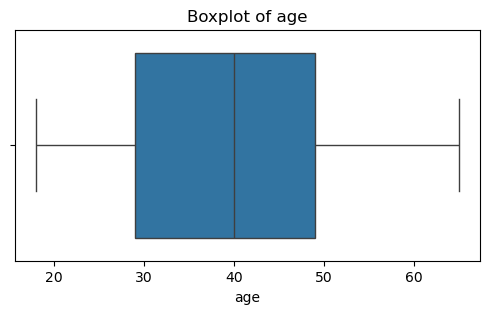

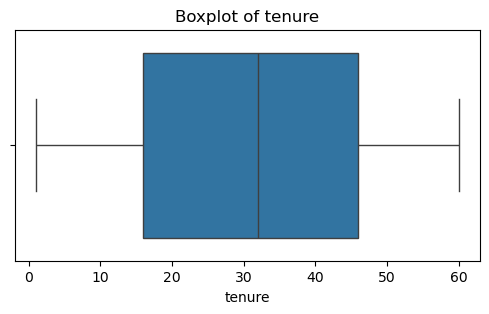

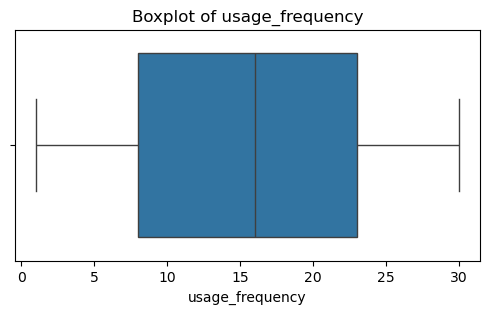

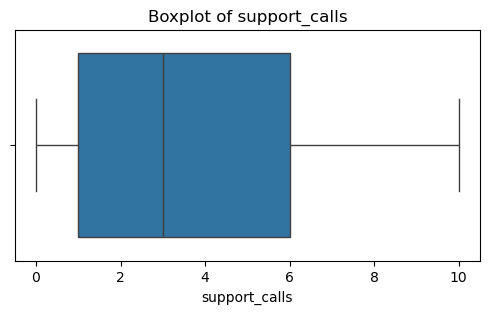

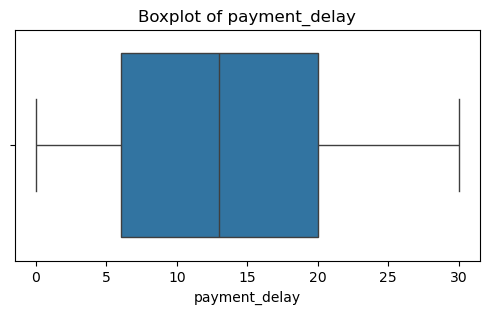

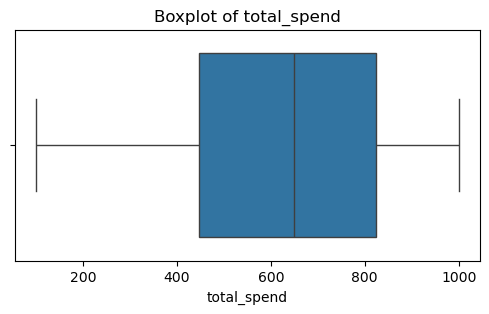

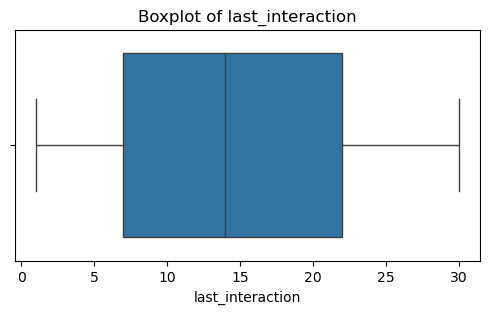

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

C:\Users\amet1\AppData\Local\Temp\ipykernel_17812\4219860382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [9]:
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

C:\Users\amet1\AppData\Local\Temp\ipykernel_17812\1498988414.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [ ]:
df = df[df['churn'].notna()]

In [ ]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

age                  0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
churn                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502958 entries, 0 to 505206
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                502958 non-null  float64
 1   tenure             502958 non-null  float64
 2   usage_frequency    502958 non-null  float64
 3   support_calls      502958 non-null  float64
 4   payment_delay      502958 non-null  float64
 5   subscription_type  502958 non-null  object 
 6   contract_length    502958 non-null  object 
 7   total_spend        502958 non-null  float64
 8   last_interaction   502958 non-null  float64
 9   churn              502958 non-null  float64
dtypes: float64(8), object(2)
memory usage: 42.2+ MB


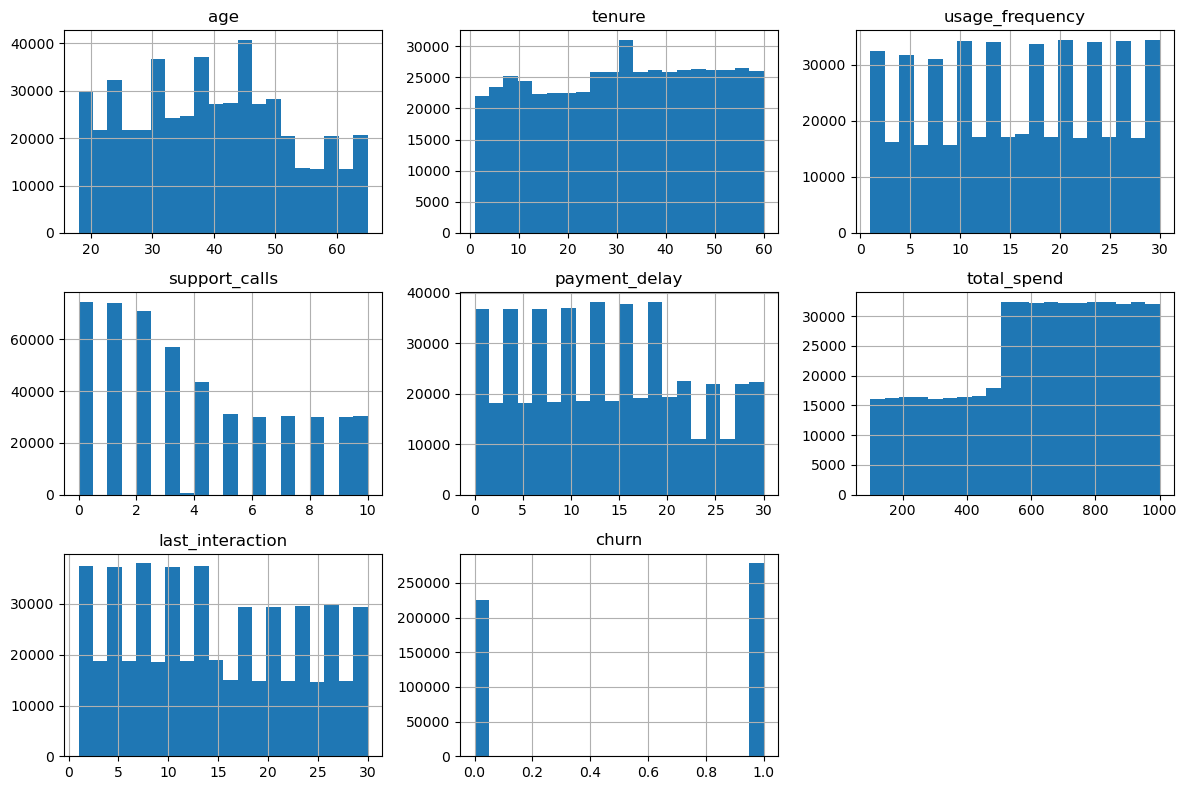

In [13]:
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [14]:
X = df.drop('churn', axis=1)
y = df['churn'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=101)

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {"classifier__C": [0.1, 1, 10]}
    ),
    "RandomForest": (
        RandomForestClassifier(),
        {"classifier__n_estimators": [100, 200 ],
         "classifier__max_depth": [5, 10, None]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(),
        {"classifier__n_estimators": [100, 200],
         "classifier__learning_rate": [0.05, 0.1]}
    ),
    "SVM": (
        SVC(),
        {"classifier__C": [0.1, 1, 10],
         "classifier__kernel": ["linear", "rbf"]}
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        {"classifier__n_estimators": [100, 200],
         "classifier__learning_rate": [0.05, 0.1]}
    )
}

best_models = {}

for name, (model, params) in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),  
        ("classifier", model)
    ])
    
    grid = GridSearchCV(pipe, params, cv=3, scoring="f1_macro", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)
    
    best_models[name] = {
        "Best Parameters": grid.best_params_,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    }

results = pd.DataFrame(best_models).T
print(results)

In [23]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['subscription_type',
                                                   'contract_length']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'tenure',
                                                   'usage_frequency',
                                                   'support_calls',
                                                   'payment_delay',
                                                   'total_spend',
                                                   'last_interaction'])])),
                ('classifier', RandomForestClassifier())])

In [24]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9294377286464133

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     67303
         1.0       0.90      0.98      0.94     83585

    accuracy                           0.93    150888
   macro avg       0.94      0.92      0.93    150888
weighted avg       0.93      0.93      0.93    150888


Confusion Matrix:
[[57987  9316]
 [ 1331 82254]]


Accuracy: 0.9294377286464133


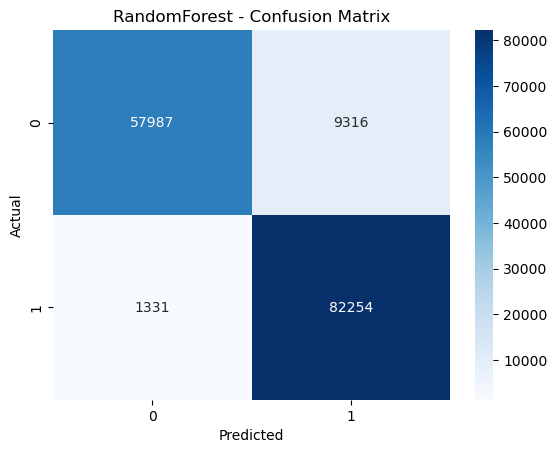

In [25]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("RandomForest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import joblib
joblib.dump(model, "rf_model_compressed.pkl", compress=3)

['rf_model.pkl']

In [ ]:
age
tenure
usage_frequency
support_calls
payment_delay
subscription_type
contract_length
total_spend
last_interaction